Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5550/5550 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.9834 - loss: 0.0518 - val_accuracy: 1.0000 - val_loss: 8.1841e-06
Epoch 2/5
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 1.0000 - loss: 1.4123e-05 - val_accuracy: 0.9993 - val_loss: 0.0020
Epoch 3/5
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9999 - loss: 2.3483e-04 - val_accuracy: 1.0000 - val_loss: 1.3342e-06
Epoch 4/5
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 1.0000 - loss: 3.0086e-07 - val_accuracy: 1.0000 - val_loss: 1.7482e-07
Epoch 5/5
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 1.0000 - loss: 1.7429e-08 - val_accuracy: 1.0000 - val_loss: 2.4676e-08
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 1.8560e-08
Test Accuracy: 1.0000

=== Model Summary ===


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,203 (47.67 KB)

 Trainable params: 4,067 (15.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,136 (31.79 KB)


=== Network Weights ===
Layer: dense_19
Weights shape: (21, 64)
Biases shape: (64,)

Layer: dense_20
Weights shape: (64, 32)
Biases shape: (32,)

Layer: dense_21
Weights shape: (32, 16)
Biases shape: (16,)

Layer: dense_22
Weights shape: (16, 3)
Biases shape: (3,)



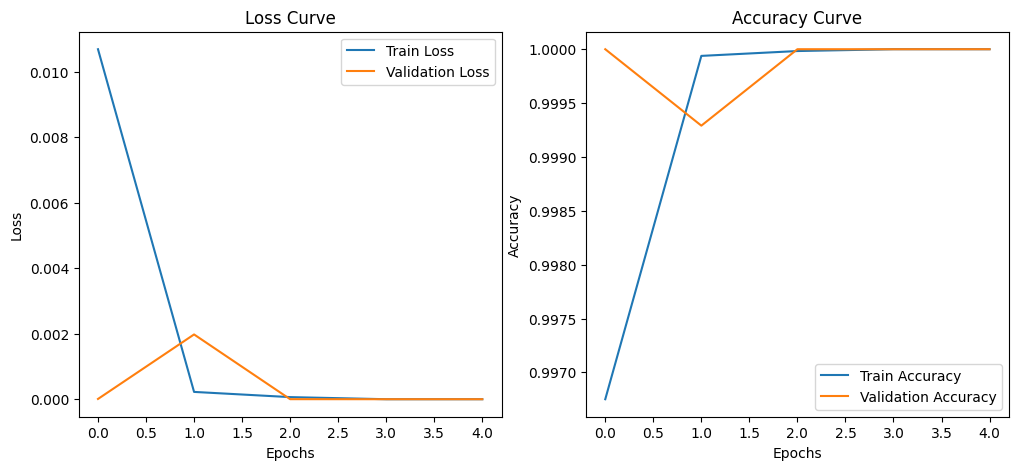

2379/2379 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

=== Confusion Matrix ===


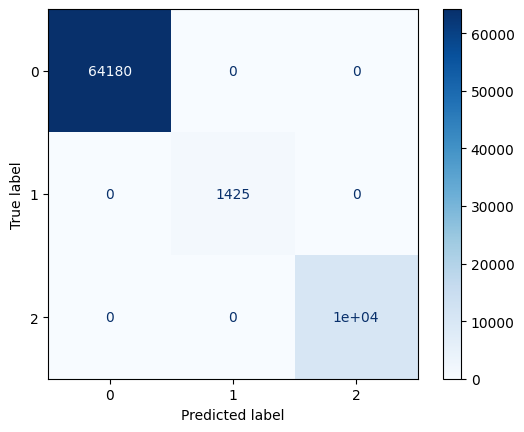

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load CSV file
df = pd.read_csv("/content/drive/MyDrive/diabetes_012_health_indicators_BRFSS2015.csv")  # Replace with actual file path

# Convert DataFrame to NumPy arrays
X = df.iloc[:, :-1].values  # Features (all columns except last)
y = df.iloc[:, 0].values    # Target (first column)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode labels
y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),  # Input Layer
    Dense(32, activation='relu'),  # Hidden Layer 1
    Dense(16, activation='relu'),  # Hidden Layer 2
    Dense(y.shape[1], activation='softmax')  # Output Layer (multi-class classification)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Print Model Summary
print("\n=== Model Summary ===")
model.summary()

# Print Network Weights
print("\n=== Network Weights ===")
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Layer: {layer.name}")
    print(f"Weights shape: {weights.shape}")
    print(f"Biases shape: {biases.shape}\n")

# Plot Loss & Accuracy Graphs
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert from one-hot to class labels
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

print("\n=== Confusion Matrix ===")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()
